In [32]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import sparse as sp
import cv2
import math

In [33]:
im = cv2.imread('im_goutte.png', 0)
colonne,ligne = len(im),len(im[0])

K=400
s=[i/K for i in range(K+1)]


x0=math.floor(ligne/2)
y0=math.floor(colonne/2)

amp=90

c=np.zeros((K+1,1,2),dtype=int)

c[:,0,0] = [x0 + amp*math.cos(2*math.pi*i) for i in s]
c[:,0,1] = [y0 + amp*math.sin(2*math.pi*i) for i in s]

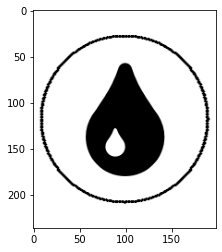

In [34]:
cv2.drawContours(image=im,contours=c, contourIdx=-1, color=(0, 255, 0), thickness=2,lineType=cv2.LINE_AA)

cv2.imwrite('goutte_snake_initialisation.png',im)

plt.figure()
plt.imshow(im,'gray')
plt.show()


Calcul des dérivées premières et secondes
Mise en place des variables pour la descente du snake

In [35]:
alpha=1
beta=0.5
gamma=0.5


k1 = np.array([np.ones(K-1),-2*np.ones(K),np.ones(K-1)])
offset1 = [-1,0,1]
D2 = sp.diags(k1,offset1).toarray()

D2[K-1][0]=1
D2[0][K-1]=1


k2 = np.array([np.ones(K-2),-4*np.ones(K-1),6*np.ones(K),-4*np.ones(K-1),np.ones(K-2)])
offset2 = [-2,-1,0,1,2]
D4 = sp.diags(k2,offset2).toarray()

D4[K-2][0]=1
D4[K-1][1]=1
D4[K-1][0]=-4

D4[0][K-2]=1
D4[1][K-1]=1
D4[0][K-1]=-4

D=alpha*D2+beta*D4

/opt/python/cpe/lib/python3.6/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  
/opt/python/cpe/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


Mise en place des itérations

In [42]:
#initialisation :

A=np.linalg.inv(np.identity(np.shape(D)[0])-D)
GradX,GradY=np.gradient(im)
EnergExterne=np.square(GradX)+np.square(GradY)
GradEnerg=np.gradient(EnergExterne)/(np.gradient(EnergExterne)[0]+np.gradient(EnergExterne)[1])